## Question 1

1a: The separating line between the two classes would run diagonally with positive slope. Because w is always perpendicular to that separating line, w runs diagonally with negative slope. 

1b: If the first component is increased, that means that x1 has more influence on determining the classes. Consequently, w would point more horizontally and the separating line would be more vertically. If the second component is increased, that means that x2 has more influence on determining the classes. Consequently, w would point more vertically and the separating line would be more horizontally.

1c: If |w| is scaled smaller, neither the direction of the w nor the direction of the separating line will change (because these depend on the ratio between the components of w). What will change is the distance from the separating line to the origin. With small |w|, the separating line is far away from the origin (because it takes high x1 and x2 values to get the outcome equal to 1). When dividing by an increasingly small constant, |w| will increase and the separating line will come closer and closer to the origin. In the limit to zero, the separating line will go through the origin. 

1d: The things described in 1c (|w| going to infinity) cannot happen when the separating hyperplane is defined by w<sup>T</sup>x = 1, because there would be blue dots on both sides of the separating line, no matter the orientation of the line in space. When we introduce b, we can shift the hyperplane up and down with amounts with like (independent of |w|). This allows more freedom in choosing |w|. In SVM, the redundancy is resolved by minimizing the size of w, resulting in the widest possible separating "street"

1e: Depends on how you define margin. For "margin between hyperplane and data", I would think of distance between middle of street and data, which is about 0.5. However, a more common definition of margin seems to be the width of the street, which is about 1.0

1f: The width of the street (i.e. margin) is 2/|w| and has to be about 1.0, therefore |w| is about 2. w seems about parallel to the line from (-1,0) to (1.6, -1.5), which is the vector (2.6, -1.5), or the unity vector (0.87, -0.50). w would therefore be equal to 2*(0.87, -0.50), or about (1.75, -1.00]). w<sup>T</sup>x + b would have to result in 1 at the nearest red data points. I choose the point (1.2, -0.2) that would, without b, result in:

In [29]:
import numpy as np 
w = [1.75, -1.00]
x = [1.2, -0.2]

print(np.dot(w, x))


2.3000000000000003


Therefore, b should be about -1.3. We can test this on another data point, for example (1.7, 0.75): 

In [31]:
b = -1.3
x = [1.7, 0.75]
print(np.dot(w, x)+b)

0.925


That is about right. Now I test it for a blue support vector, which should result in -1. I take (0.9, 1.25)

In [32]:
x = [0.9, 1.25]
print(np.dot(w, x)+b)

-0.9750000000000001


This is also about right! Seems I got it :)

1g: I expect 6 support vectors because both the line through the "middle" three blue data points and the line through the "middle" three red data points seem parallel to the separating line created by the separating hyperplane.

To my knowledge, the non-support vectors do NOT play a any role in the final solution

## Question 2
2a: objective is to minimize 0.5|w|<sup>2</sup>), subject to y(w<sup>T</sup>x + b) > 1

2b: the objective (i.e. minimize 0.5|w|<sup>2</sup>) is responsible for maximizing the margin between the hyperplane and the data

2c: we can introduce an additional component of x that consists only of ones. our augmented w vector consists of our original w vector plus one new component that is multiplied by the new x component, and thereby replaces b

2d: augmented w, otherwise b had to be in there as well

2e: zero, because you're always correct

2f: the sum will no longer be zero, because a mistake has been made. w is adjusted in the next step to point slightly more towards the new observation, such that it is now classified correctly

## Question 3

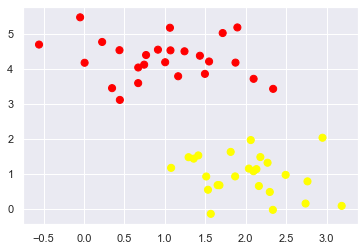

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [126]:
from sklearn.svm import SVC # "Support vector classifier"


model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

print(model.predict([[-0.8, 5]]))
print(model.predict([[2.0, 0]]))






[0]
[1]


In [122]:
def plot_svc_decision_function(model, ax=None, plot_support=True, c = 'k'):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors=c,
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [139]:
from sklearn.linear_model import SGDClassifier

clf01 = SGDClassifier(alpha = .01, max_iter=10000, tol=1e-3)
clf01.fit(X, y)

clf1 = SGDClassifier(alpha = .1, max_iter=10000, tol=1e-3)
clf1.fit(X, y)

clf10 = SGDClassifier(alpha = 10, max_iter=10000, tol=1e-3)
clf10.fit(X, y)


SGDClassifier(alpha=10, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='hinge', max_iter=10000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

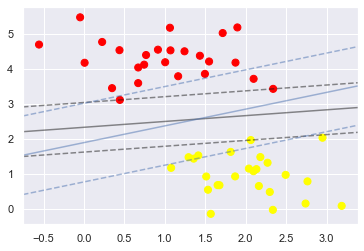

In [142]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plot_svc_decision_function(model, ax=None, plot_support = True, c = 'k');
plot_svc_decision_function(clf1, ax=None, plot_support = False, c = 'b')


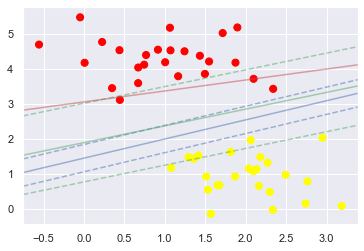

In [141]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf01, ax=None, plot_support = False, c = 'b')
plot_svc_decision_function(clf1, ax=None, plot_support = False, c = 'g')
plot_svc_decision_function(clf10, ax=None, plot_support = False, c = 'r')


3b: the alpha parameter seems to determine the margin, with smaller alpha values resulting in larger margins

3c: when you don't shuffle you introduce a bias towards samples that "come first". whether or not we shuffle is specified by the shuffle parameter in the SGDClassifier function, which is either set to True of False

## Question 4